In [119]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import calendar
import xarray as xr 


参考自：
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [120]:
path = r'I:/sst.mon.anom.nc'
ds   = xr.open_dataset(path).sel(time=slice('2000-01-01', '2019-12-01'))

ds

<xarray.Dataset> Size: 2MB
Dimensions:  (lat: 36, lon: 72, time: 240)
Coordinates:
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2019-12-01
Data variables:
    sst      (time, lat, lon) float32 2MB ...
Attributes:
    title:          Kaplan Extended SST V2
    platform:       Analysis
    Conventions:    COARDS
    history:        Originally converted from the IRI format to netCDF3 10/20...
    dataset_title:  Kaplan Extended V2 SST anomaly data
    description:    Data is processed at Lamont-Doherty using an \noptimal an...
    References:     https://www.psl.noaa.gov/data/gridded/data.kaplan_sst.html

In [121]:
ds_mean = ds.sel(lat=slice(-20, 20), lon=slice(120, 180)).mean(dim=['lat', 'lon']).groupby('time.year').apply(lambda x: x.groupby('time.month').mean())
ds_mean

<xarray.Dataset> Size: 1kB
Dimensions:  (year: 20, month: 12)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * year     (year) int64 160B 2000 2001 2002 2003 2004 ... 2016 2017 2018 2019
Data variables:
    sst      (year, month) float32 960B 0.4892 0.4123 0.3089 ... 0.4792 0.6997

将 xarray 数据转换为 Pandas DataFrame

In [122]:
df_mean = ds_mean.to_dataframe().reset_index()
df_mean

,year,month,sst
0,2000,1,0.489171
1,2000,2,0.412289
2,2000,3,0.308883
3,2000,4,0.395707
4,2000,5,0.245279
...,...,...,...
235,2019,8,0.404243
236,2019,9,0.329373
237,2019,10,0.526904
238,2019,11,0.479243


使用 pivot 将数据转换为年 x 月的二维矩阵

In [123]:
pivot_df = df_mean.pivot(index='year', columns='month', values='sst')
pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,0.489171,0.412289,0.308883,0.395707,0.245279,0.061751,0.014463,0.164603,0.290694,0.341715,0.476438,0.335065
2001,0.559517,0.457950,0.529160,0.525770,0.461773,0.388551,0.296127,0.242365,0.343296,0.412877,0.470040,0.459012
2002,0.585019,0.550761,0.483849,0.640916,0.569629,0.408042,0.210777,0.138431,0.147316,0.208812,0.361650,0.350030
2003,0.418767,0.383338,0.458313,0.571680,0.418849,0.226443,0.276504,0.317486,0.341039,0.494797,0.464730,0.518526
2004,0.632334,0.640162,0.565267,0.525361,0.434664,0.163895,0.163836,0.040876,0.120255,0.181847,0.340273,0.441896
2005,0.487775,0.436561,0.400082,0.346575,0.294939,0.201700,0.303997,0.351243,0.332520,0.543217,0.549284,0.604607
2006,0.553774,0.366583,0.289229,0.419241,0.392864,0.283613,0.127216,0.066161,0.206180,-0.009588,0.243960,0.388810
2007,0.492036,0.401603,0.356195,0.311556,0.359256,0.406870,0.294576,0.277131,0.272453,0.345593,0.212503,0.328128
2008,0.266547,0.375107,0.286309,0.278161,0.026969,-0.078847,0.036898,0.173059,0.277390,0.340114,0.352861,0.535329


In [124]:
# pivot_df.columns = [calendar.month_name[i] for i in pivot_df.columns]

In [125]:
pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,0.489171,0.412289,0.308883,0.395707,0.245279,0.061751,0.014463,0.164603,0.290694,0.341715,0.476438,0.335065
2001,0.559517,0.457950,0.529160,0.525770,0.461773,0.388551,0.296127,0.242365,0.343296,0.412877,0.470040,0.459012
2002,0.585019,0.550761,0.483849,0.640916,0.569629,0.408042,0.210777,0.138431,0.147316,0.208812,0.361650,0.350030
2003,0.418767,0.383338,0.458313,0.571680,0.418849,0.226443,0.276504,0.317486,0.341039,0.494797,0.464730,0.518526
2004,0.632334,0.640162,0.565267,0.525361,0.434664,0.163895,0.163836,0.040876,0.120255,0.181847,0.340273,0.441896
2005,0.487775,0.436561,0.400082,0.346575,0.294939,0.201700,0.303997,0.351243,0.332520,0.543217,0.549284,0.604607
2006,0.553774,0.366583,0.289229,0.419241,0.392864,0.283613,0.127216,0.066161,0.206180,-0.009588,0.243960,0.388810
2007,0.492036,0.401603,0.356195,0.311556,0.359256,0.406870,0.294576,0.277131,0.272453,0.345593,0.212503,0.328128
2008,0.266547,0.375107,0.286309,0.278161,0.026969,-0.078847,0.036898,0.173059,0.277390,0.340114,0.352861,0.535329


In [126]:
pivot_df.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2000,0.489171,0.412289,0.308883,0.395707,0.245279,0.061751,0.014463,0.164603,0.290694,0.341715,0.476438,0.335065
2001,0.559517,0.457950,0.529160,0.525770,0.461773,0.388551,0.296127,0.242365,0.343296,0.412877,0.470040,0.459012
2002,0.585019,0.550761,0.483849,0.640916,0.569629,0.408042,0.210777,0.138431,0.147316,0.208812,0.361650,0.350030
2003,0.418767,0.383338,0.458313,0.571680,0.418849,0.226443,0.276504,0.317486,0.341039,0.494797,0.464730,0.518526
2004,0.632334,0.640162,0.565267,0.525361,0.434664,0.163895,0.163836,0.040876,0.120255,0.181847,0.340273,0.441896


In [127]:
def plot(returns,
         title="Global Temperature Anomaly ($^\circ$C)\n",
         title_color="black",
         title_size=14,
         annot_size=5,
         vmin = -1.0,
         vmax = 1.0,
         figsize=None,
         cmap='RdBu_r',
         cbar=True,
         square=False):
    plt.rcParams["font.family"] = "Times New Roman"

    if figsize is None:
        size = list(plt.gcf().get_size_inches())
        figsize = (size[0], size[0] // 2)
        plt.close()
 
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(returns, ax=ax, annot=False, vmin=vmin, vmax=vmax, center=0,
                     annot_kws={"size": annot_size},
                     fmt="0.2f", linewidths=0.5,
                     square=square, cbar=cbar, cbar_kws={'fraction':0.10},
                     cmap=cmap)
    ax.set_title(title, fontsize=title_size,
                 color=title_color, fontweight="bold")
    ax.set_xlabel('Month')
    ax.set_ylabel('Year')
    fig.subplots_adjust(hspace=0)
    plt.yticks(rotation=0)
    plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jixianpu\AppData\Local\Temp\ipykernel_7964\1747630503.py:2: SyntaxWarning: invalid escape sequence '\c'
  title="Global Temperature Anomaly ($^\circ$C)\n",


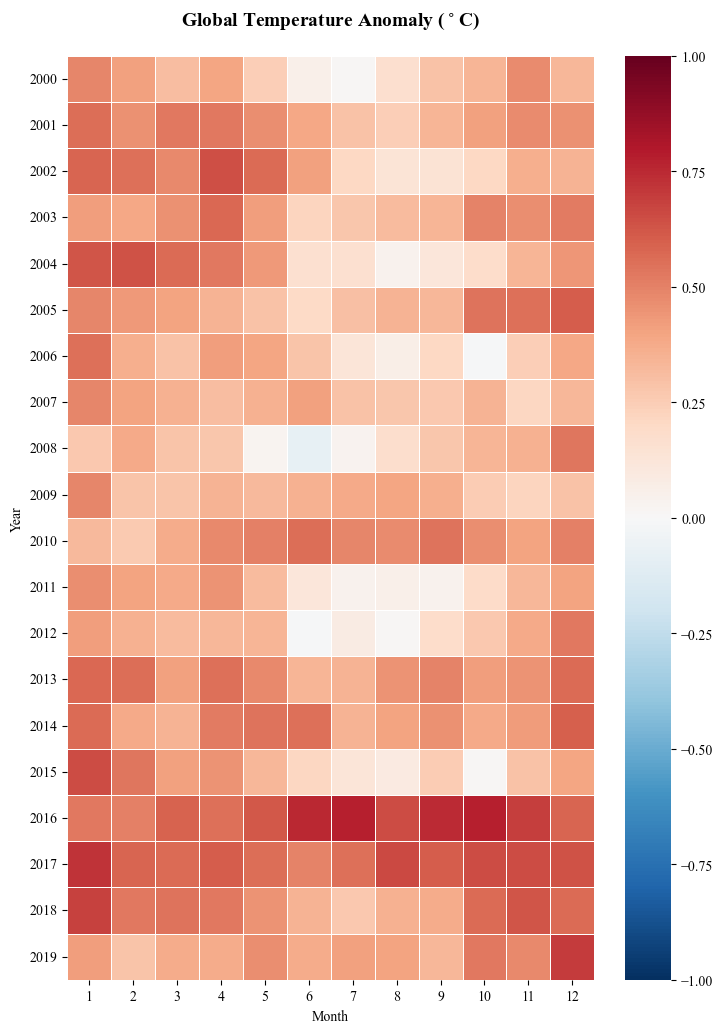

In [128]:
plot(pivot_df, figsize=[8, 12])

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jixianpu\AppData\Local\Temp\ipykernel_7964\300557345.py:1: SyntaxWarning: invalid escape sequence '\c'
  pivot_df.plot(title="Global Temperature Anomaly ($^\circ$C)", figsize=[15, 7])


<Axes: title={'center': 'Global Temperature Anomaly ($^\\circ$C)'}, xlabel='year'>

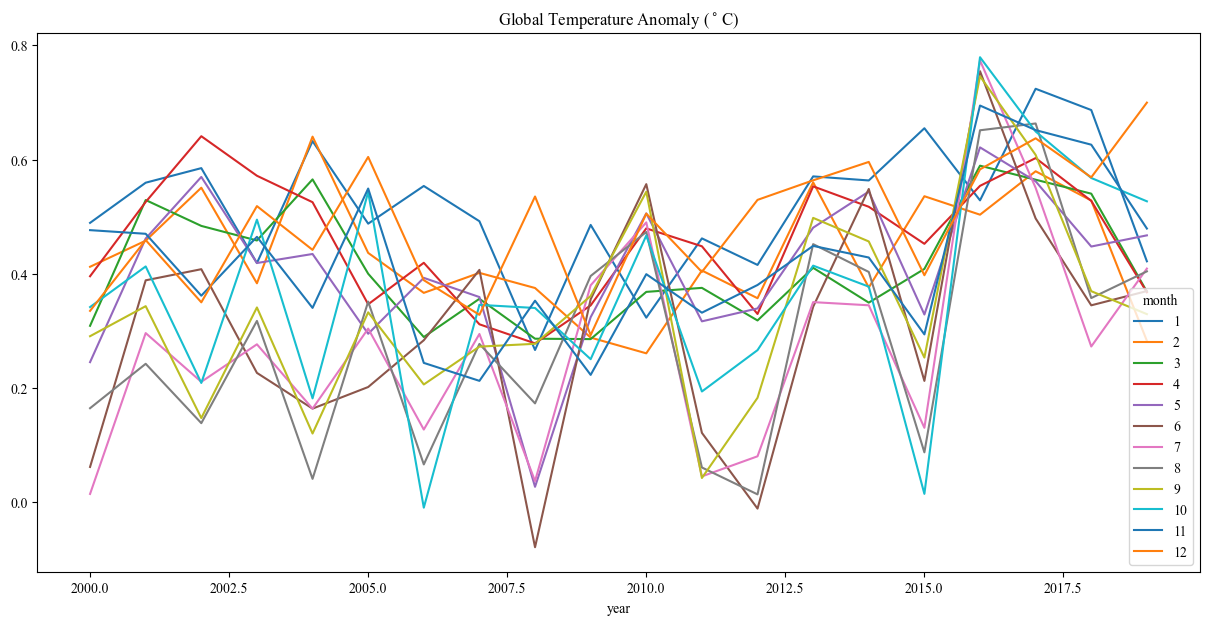

In [129]:
pivot_df.plot(title="Global Temperature Anomaly ($^\circ$C)", figsize=[15, 7])

In [130]:
import numpy as np
# 创建一个示例 NumPy 数组
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 将 NumPy 数组转换为 Pandas DataFrame
df = pd.DataFrame(data, columns=['Column1', 'Column2', 'Column3'])

# 显示结果
df

,Column1,Column2,Column3
0,1,2,3
1,4,5,6
2,7,8,9
